# Python GIS Workbook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import rasterio
import rasterio.plot
from shapely.geometry import Point

In [2]:
plt.rcParams["figure.figsize"] = [3,4]  # Set default figure size

## GeoPandas Examples

In [100]:
# Import raster file
currents = rasterio.open('data/Surface Currents.tif')

# Create sampling points
x = [400000, 400000, 600000]
y = [4400000, 4600000, 4600000]
points = [Point(x[0], y[0]), Point(x[1], y[1]), Point(x[2], y[2])]
data = {'x': x, 'y': y, 'geometry': points}
gdf = geopandas.GeoDataFrame(data=data, crs=32630)
gdf.head()

,x,y,geometry
0,400000,4400000,POINT (400000.000 4400000.000)
1,400000,4600000,POINT (400000.000 4600000.000)
2,600000,4600000,POINT (600000.000 4600000.000)


<AxesSubplot:>

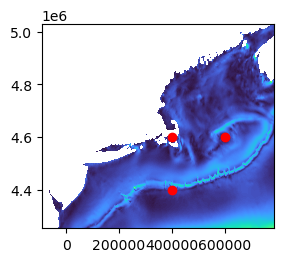

In [101]:
fig, ax = plt.subplots()

# transform rasterio plot to real world coords
extent=[currents.bounds[0], currents.bounds[2], currents.bounds[1], currents.bounds[3]]
ax = rasterio.plot.show(currents, extent=extent, ax=ax, cmap='turbo')

gdf.plot(ax=ax, color='red')

In [102]:
coord_list = [(x,y) for x,y in zip(gdf['geometry'].x , gdf['geometry'].y)]
gdf['current'] = [x for x in currents.sample(coord_list)]
gdf.head()

,x,y,geometry,current
0,400000,4400000,POINT (400000.000 4400000.000),"[0.0742688, 181.08922]"
1,400000,4600000,POINT (400000.000 4600000.000),"[0.08844339, 73.10852]"
2,600000,4600000,POINT (600000.000 4600000.000),"[0.04151321, 44.972664]"


In [24]:
gdf.query("x == {} & y == {}".format(x[0], y[0]))

,x,y,geometry,current
0,400000,4400000,POINT (400000.000 4400000.000),"[0.0742688, 181.08922]"


In [118]:
def ask(x_, y_, set):
    if x_ in gdf.x.values and y_ in gdf.loc[gdf.x == x_].y.values:
        gdf.loc[gdf.x == x_][gdf.y == y_]
        print('in set')
        [x for x in currents.sample([(x_, y_)])][0]
    else:
        gdf.loc[len(gdf.index)] = {'x': x_, 'y': y_, 'geometry': Point(x_, y_)}
        print('ya')

In [119]:
ask(400, 600, "currents")
gdf

ya


,x,y,geometry,current
0,400000,4400000,POINT (400000.000 4400000.000),"[0.0742688, 181.08922]"
1,400000,4600000,POINT (400000.000 4600000.000),"[0.08844339, 73.10852]"
2,600000,4600000,POINT (600000.000 4600000.000),"[0.04151321, 44.972664]"
3,400,600,POINT (400.000 600.000),NaN


In [103]:
[(x,y) for x,y in zip(gdf['geometry'].x , gdf['geometry'].y)]

[(400000.0, 4400000.0), (400000.0, 4600000.0), (600000.0, 4600000.0)]

In [117]:
[x for x in currents.sample([(x_, y_)])][0]

0.0


In [114]:
for i in currents.sample([(x_, y_)]):
    print(i)

[0. 0.]


## GISHandler Examples

In [6]:
import gis_handler

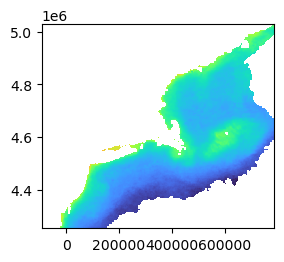

In [7]:
raster_files = {'current': 'data/Surface Currents.tif',
                'chlorophyll': 'data/Summer Chlorophyll.tif',
                'temperature': 'data/Surface Temperature.tif'}

handler = gis_handler.GISHandler()
handler.load_raster_files(raster_files)
handler.display_raster('chlorophyll')

In [8]:
handler.query(400000.000, 4400000.000, "temperature")

array([15.777459], dtype=float32)

In [9]:
handler.sample_points

,0,geometry,temperature
0,400000.0-4400000.0,POINT (400000.000 4400000.000),[15.777459]
